In [44]:
import camb
from camb import model, initialpower
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table

# Set the cosmological parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=70.156, ombh2=0.074, omch2=0.065, tau=0.043)
pars.InitPower.set_params(As=1.914e-9, ns=1.078)

# Use the parameterized equation of state for dark energy
pars.set_dark_energy(w=-0.281, wa=-0.424, dark_energy_model='ppf')

# Set CMB computation details
pars.set_for_lmax(2500, lens_potential_accuracy=1)

# Run CAMB
results = camb.get_results(pars)

# Get the power spectra
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
lmax = results.get_lensed_scalar_cls(CMB_unit='muK')

for name in powers:
    print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [49]:
totCL = powers['total']
unlensedCL = powers['unlensed_scalar']
print(totCL.shape)
ells = np.arange(totCL.shape[0])
ls = np.arange(lmax.shape[0])


(2551, 4)


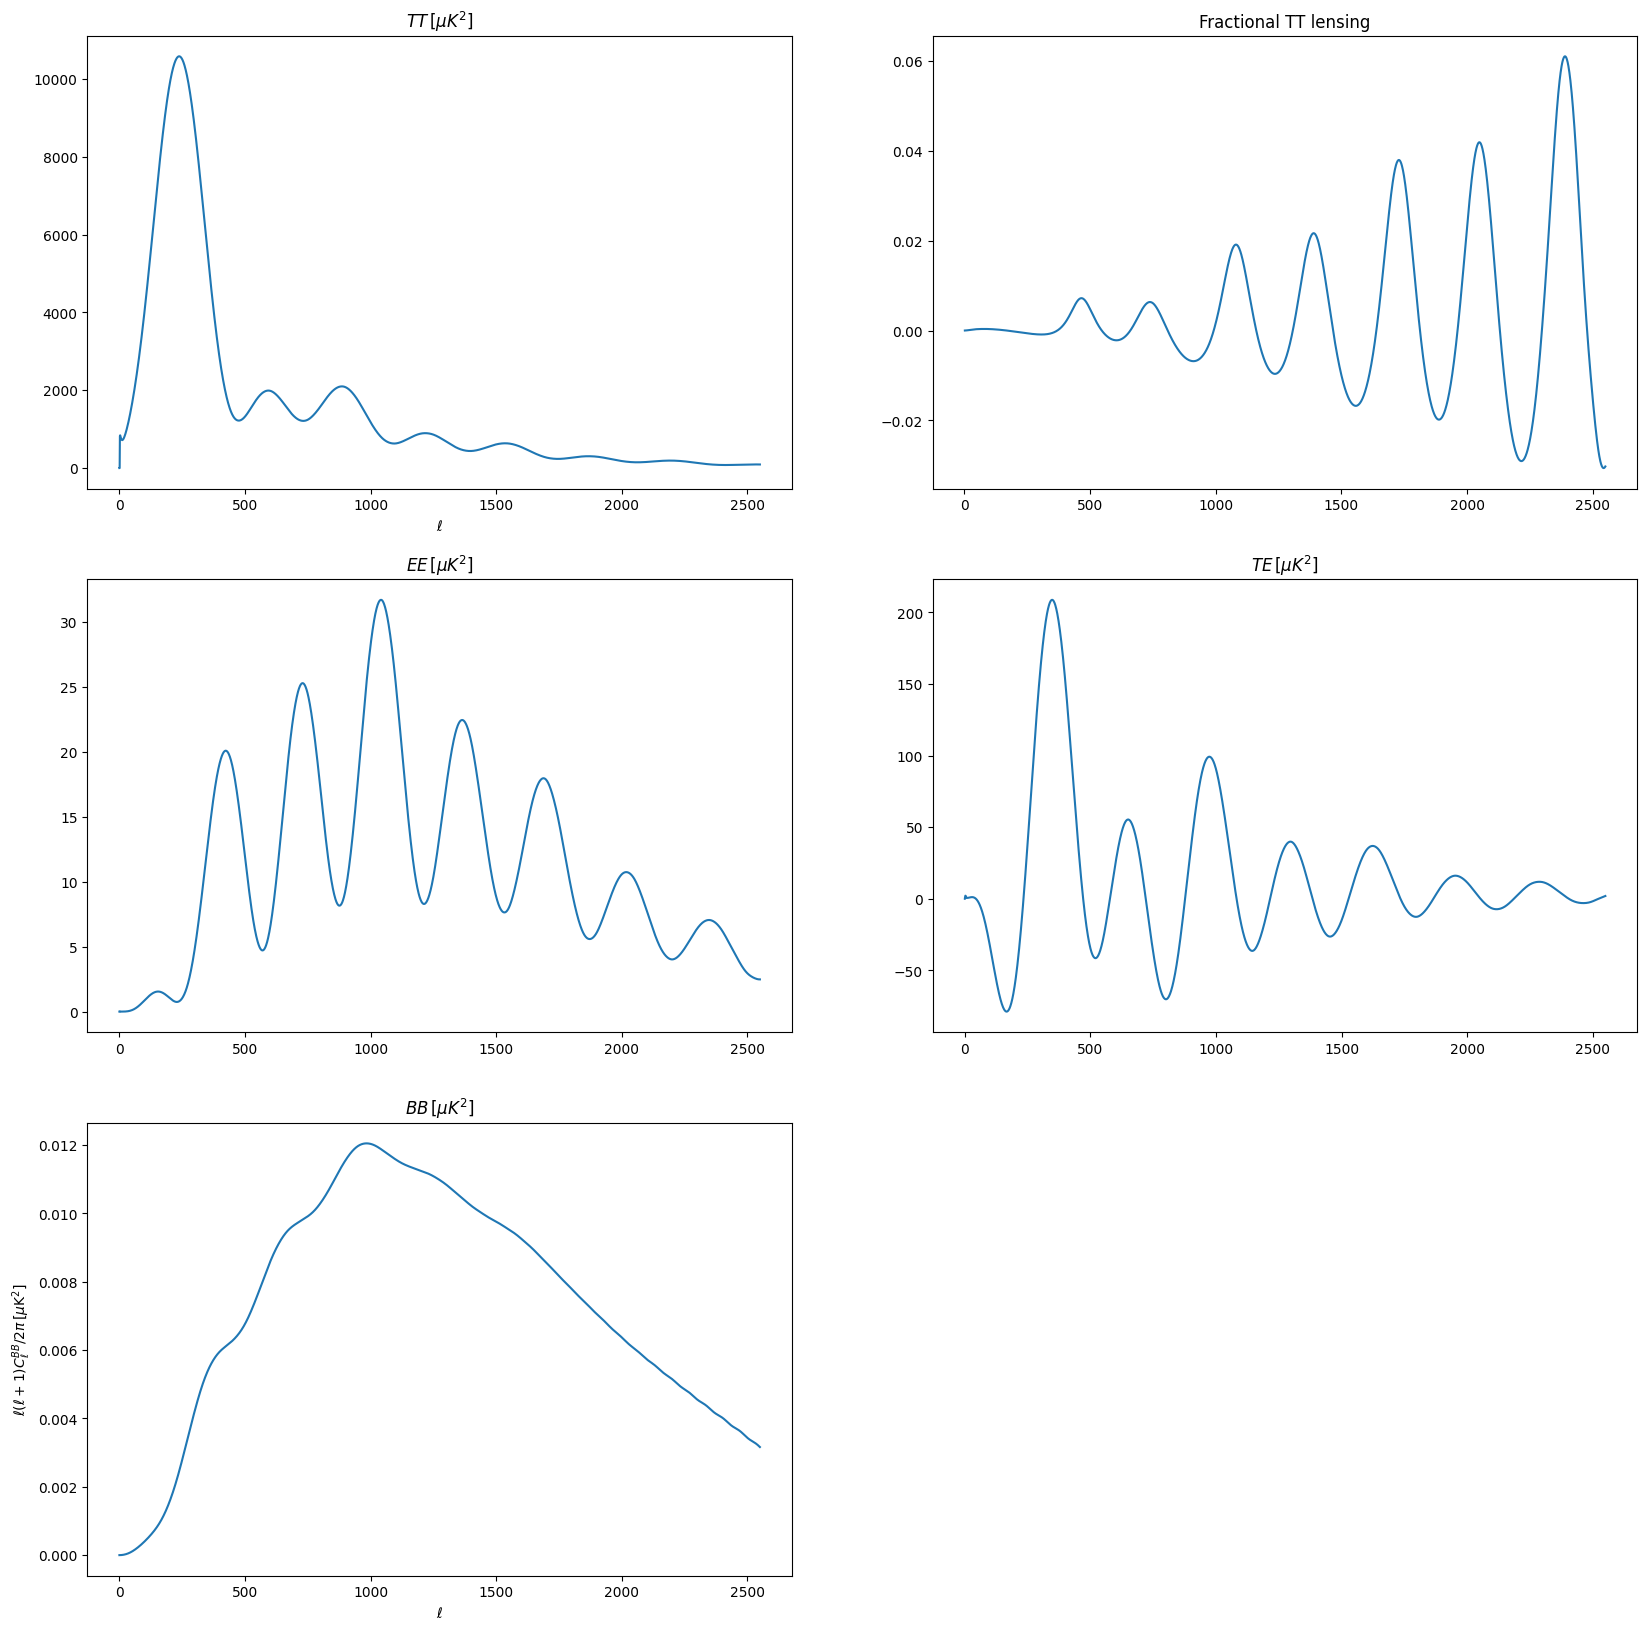

In [52]:
# Plot the total CMB power spectrum
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
#plt.figure(figsize=(10,6))
ax[0,0].plot(ells, totCL[:,0], label='TT')
ax[0,0].set_xlabel(r'$\ell$')
ax[0,0].set_title(r'$TT\, [\mu K^2]$')
ax[0,1].plot(ells[2:], 1 - unlensedCL[2:, 0] / totCL[2:, 0])
ax[0, 1].set_title(r'Fractional TT lensing')
ax[1,0].plot(ells, totCL[:,1])
ax[1,0].set_title(r'$EE\, [\mu K^2]$')
ax[1,1].plot(ells, totCL[:,3])
ax[1,1].set_title(r'$TE\, [\mu K^2]$')
ax[2,0].plot(ls, lmax[: len(ls), 2] )
ax[2,0].set_xlabel(r'$\ell$')
ax[2,0].set_ylabel(r'$\ell(\ell+1)C_\ell^{BB}/2\pi\,[\mu {\rm K}^2]$')
ax[2,0].set_title('$BB\, [\mu K^2]$')
fig.delaxes(ax[2, 1])
